<a href="https://colab.research.google.com/github/2k177/ML/blob/main/ML_foundation/notebooks/2_Linear_algebra_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Affine Transformation via Matrix Application

Let's say we have a vector  v :

In [1]:
import numpy as np
v = np.array([3,1])
v

array([3, 1])

Let's plot $v$ using `plot_vectors()` function (which is based on Hadrien Jean's `plotVectors()` function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [2]:
import matplotlib.pyplot as plt

In [3]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

(-10.0, 10.0)

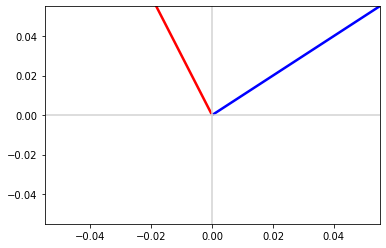

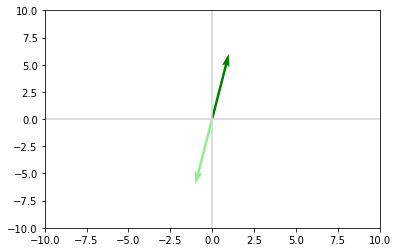

In [4]:
plot_vectors([[-1, 3], [2, 2]], ['red', 'blue'])
plot_vectors([[1, 6], [-1, -6]], ['green', 'lightgreen'])
plt.xlim(-10, 10) #x-axis range
plt.ylim(-10, 10) # y-axis range

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector:

In [5]:
I = np.array([[1,0], [0,1]])
I

array([[1, 0],
       [0, 1]])

In [6]:
Iv = np.dot(I,v)
Iv

array([3, 1])

In [7]:
v == Iv

array([ True,  True])

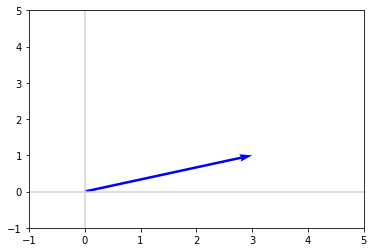

In [8]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

In contrast, consider this matrix (let's call it  E ) that flips vectors over the  x -axis:

In [9]:
E = np.array([[1,0],[0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [10]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

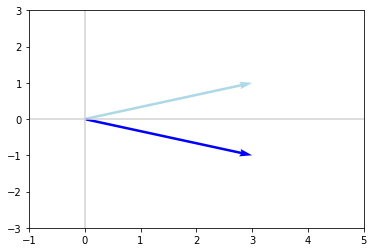

In [11]:
plot_vectors([Iv, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix F, which flips vector over the y axis:

In [12]:
F = np.array([[-1,0], [0,1]])
F

array([[-1,  0],
       [ 0,  1]])

In [13]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

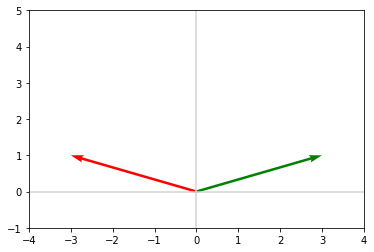

In [14]:
plot_vectors([v, Fv], ['green', 'red'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* (example of this on the Mona Lisa coming up shortly)
* *Rotation* 

(See [here](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) for an outstanding blog post on affine transformations in Python, including how to apply them to images as well as vectors.)

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix  A  to the vector  v :

In [15]:
A = np.array([[1,4], [2,-2]])
A

array([[ 1,  4],
       [ 2, -2]])

In [16]:
v

array([3, 1])

In [17]:
Av = np.dot(A, v)
Av

array([7, 4])

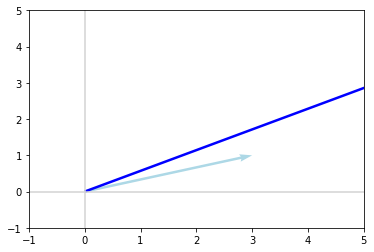

In [18]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

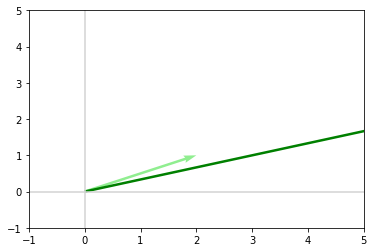

In [19]:
v2 = np.array([2,1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say,  V ), where each column is a separate vector. Then, whatever linear transformations we apply to  V  will be independently applied to each column (vector):

In [20]:
v

array([3, 1])

In [21]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T 

matrix([[3],
        [1]])

In [22]:
v3  =np.array([-3,-1])
v4 = np.array([-1,1])
v3

array([-3, -1])

In [23]:
v4

array([-1,  1])

In [24]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [25]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [26]:
A

array([[ 1,  4],
       [ 2, -2]])

In [27]:
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [28]:
AV = np.dot(A, V)
AV

matrix([[ 7,  6, -7,  3],
        [ 4,  2, -4, -4]])

In [29]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [30]:
vectorfy(V, 0)

array([3, 1])

In [31]:
vectorfy(V, 1)

array([2, 1])

In [32]:
vectorfy(V, 3)

array([-1,  1])

In [33]:
vectorfy(V, 0) == v

array([ True,  True])

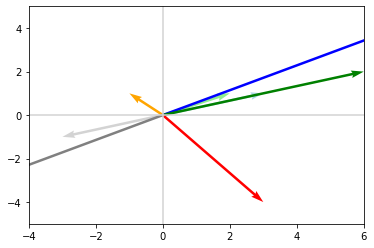

In [34]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: 

$Av = \lambda v$

In [35]:
A

array([[ 1,  4],
       [ 2, -2]])

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), which was independently developed in the 1950s by both [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) and John Francis), however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of: 

* a vector of eigenvalues
* a matrix of eigenvectors

In [36]:
lambdas, V = np.linalg.eig(A)
A 

array([[ 1,  4],
       [ 2, -2]])

In [37]:
lambdas

array([ 2.70156212, -3.70156212])

Let's confirm that $Av = \lambda v$ for the first eigenvector: 

In [38]:
V

array([[ 0.9202015 , -0.64799372],
       [ 0.39144501,  0.76164568]])

In [39]:
v = V[:,0]
v

array([0.9202015 , 0.39144501])

In [40]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

2.7015621187164243

In [41]:
lambduh * v

array([2.48598152, 1.057513  ])

In [42]:
Av = np.dot(A, v)
Av

array([2.48598152, 1.057513  ])

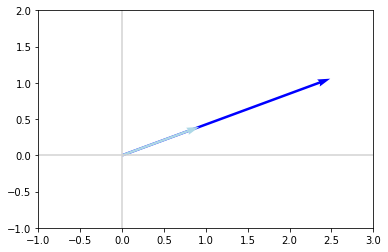

In [43]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 2)

Using the PyTorch eig() method, we can do exactly the same:

In [44]:
A

array([[ 1,  4],
       [ 2, -2]])

In [45]:
import torch
A_p = torch.tensor([[-1,4],[2,-2.]])
A_p 

tensor([[-1.,  4.],
        [ 2., -2.]])

In [46]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_p) # outputs complex numbers because real matrices can have complex eigenvectors

In [47]:
V_p = V_cplx.float()
V_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ../aten/src/ATen/native/Copy.cpp:250.)
  """Entry point for launching an IPython kernel.


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [48]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [49]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [50]:
lambdas_p = lambdas_cplx.float()
lambdas_p

tensor([ 1.3723, -4.3723])

In [51]:
Av_p = torch.matmul(A_p, v_p) # matmul() expects float-typed tensors
Av_p

tensor([1.1803, 0.7000])

In [52]:
lambdas_p * v_p

tensor([ 1.1803, -2.2303])

### Eigenvectors in >2 Dimensions

While plotting gets trickier in higher-dimensional spaces, we can nevertheless find and use eigenvectors with more than two dimensions. Here's a 3D example (there are three dimensions handled over three rows):

In [53]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [54]:
lambdas_X, V_X = np.linalg.eig(X) 

In [55]:
V_X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [56]:
lambdas_X

array([29.67623202, 20.62117365, -0.29740567])

#####Confirm  Xv=λv  for an example eigenvector:

In [57]:
v_X = V_X[:,0] 
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [58]:
lambda_X = lambdas_X[0] 
lambda_X

29.676232023948902

In [59]:
np.dot(X, v_X) # matrix multiplication

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [60]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])

2x2 Matrix Determinants

In [61]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [62]:
np.linalg.det(X)

-2.0000000000000013

In [63]:
N = np.array([[-4, 1], [-8, 2]])
N

array([[-4,  1],
       [-8,  2]])

In [64]:
np.linalg.det(N)

0.0

In [65]:
# Uncommenting the following line results in a "singular matrix" error
Ninv = np.linalg.inv(N)

LinAlgError: ignored

In [66]:
N = torch.tensor([[-4, 1], [-8, 2.]])
torch.det(N)

tensor(0.)

Generalizing Determinants

In [67]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [68]:
np.linalg.det(X)

19.999999999999996

Determinants & Eigenvalues

In [69]:
lambdas, V = np.linalg.eig(X)
lambdas

array([-3.25599251, -1.13863631,  5.39462882])

In [70]:
np.product(lambdas)

19.99999999999999

Here's  |det(X)|  in NumPy:

In [71]:
np.abs(np.linalg.det(X))

19.999999999999996

Let's use a matrix  B , which is composed of basis vectors, to explore the impact of applying matrices with varying  |det(X)|  values:

In [73]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

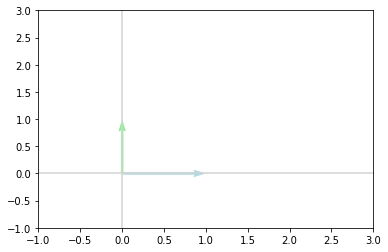

In [74]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [75]:
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [76]:
np.linalg.det(N)

0.0

In [77]:
NB = np.dot(N, B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

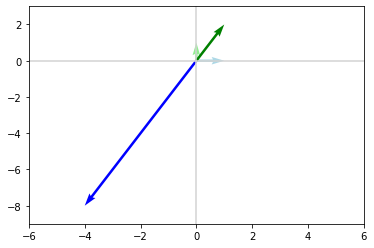

In [78]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

In [79]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.], dtype=float32)

If any one of a matrix's eigenvalues is zero, then the product of the eigenvalues must be zero and the determinant must also be zero.

Now let's try applying  I2  to  B :

In [80]:
I

array([[1, 0],
       [0, 1]])

In [81]:
np.linalg.det(I)

1.0

In [82]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

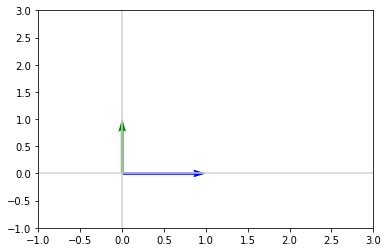

In [83]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [84]:
lambdas, V = np.linalg.eig(I)
lambdas

array([1., 1.])

All right, so applying an identity matrix isn't the most exciting operation in the world. Let's now apply this matrix  J  which is more interesting:

In [85]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [86]:
np.linalg.det(J)

-1.0

In [87]:
np.abs(np.linalg.det(J))

1.0

In [88]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

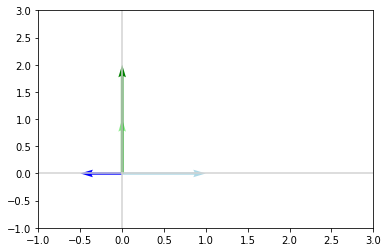

In [89]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [90]:
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

Finally, let's apply the matrix  D , which scales vectors by doubling along both the  x  and  y  axes:

In [91]:
D = I*2
D

array([[2, 0],
       [0, 2]])

In [92]:
np.linalg.det(D)

4.0

In [93]:
DB = np.dot(D, B)
DB

array([[2, 0],
       [0, 2]])

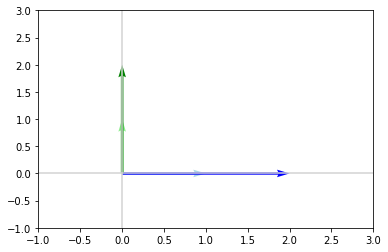

In [94]:
plot_vectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(DB, 0), vectorfy(DB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [95]:
lambdas, V = np.linalg.eig(D)
lambdas

array([2., 2.])

## Eigendecomposition

The **eigendecomposition** of some matrix $A$ is 

$A = V \Lambda V^{-1}$

Where: 

* As in examples above, $V$ is the concatenation of all the eigenvectors of $A$
* $\Lambda$ (upper-case $\lambda$) is the diagonal matrix diag($\lambda$). Note that the convention is to arrange the lambda values in descending order; as a result, the first eigenvalue (and its associated eigenvector) may be a primary characteristic of the matrix $A$.

In [96]:
A = np.array([[4, 2], [-5, -3]]) 
A

array([[ 4,  2],
       [-5, -3]])

In [97]:
lambdas, V = np.linalg.eig(A)

In [98]:
V

array([[ 0.70710678, -0.37139068],
       [-0.70710678,  0.92847669]])

In [99]:
Vinv = np.linalg.inv(V)
Vinv

array([[2.3570226 , 0.94280904],
       [1.79505494, 1.79505494]])

In [100]:
lambdas

array([ 2., -1.])

In [101]:
Lambda = np.diag(lambdas)
Lambda

array([[ 2.,  0.],
       [ 0., -1.]])

In [102]:
#Confirm that  A=VΛV−1
np.dot(V, np.dot(Lambda, Vinv))

array([[ 4.,  2.],
       [-5., -3.]])

Eigendecomposition is not possible with all matrices. And in some cases where it is possible, the eigendecomposition involves complex numbers instead of straightforward real numbers. 

In machine learning, however, we are typically working with real symmetric matrices, which can be conveniently and efficiently decomposed into real-only eigenvectors and real-only eigenvalues. If $A$ is a real symmetric matrix then...

$A = Q \Lambda Q^T$

...where $Q$ is analogous to $V$ from the previous equation except that it's special because it's an orthogonal matrix. 

In [103]:
A = np.array([[2, 1], [1, 2]])
A

array([[2, 1],
       [1, 2]])

In [104]:
lambdas, Q = np.linalg.eig(A)

In [105]:
lambdas

array([3., 1.])

In [106]:
Lambda = np.diag(lambdas)
Lambda

array([[3., 0.],
       [0., 1.]])

In [107]:
Q

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [108]:
#Let's confirm  A=QΛQT :

In [109]:
np.dot(Q, np.dot(Lambda, Q.T))

array([[2., 1.],
       [1., 2.]])

(As a quick aside, we can demostrate that $Q$ is an orthogonal matrix because $Q^TQ = QQ^T = I$.)

In [110]:
np.dot(Q.T, Q)

array([[1.00000000e+00, 2.23711432e-17],
       [2.23711432e-17, 1.00000000e+00]])

In [111]:
np.dot(Q, Q.T)

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])